# Preprocess the Images for Vegetable Training

In [1]:
# Required library for image data augmentation:
from keras.preprocessing.image import ImageDataGenerator

In [2]:
# Creation of Instance of the ImageDataGenerator class for train and test:
train_imagen = ImageDataGenerator(rescale = 1.0/255, 
                                  shear_range = 0.2,
                                  rotation_range = 10, fill_mode='nearest',
                                  width_shift_range=0.2, height_shift_range=0.2,
                                  horizontal_flip= True, vertical_flip=False,
                                  brightness_range=[0.8,1.2],
                                  zoom_range= 0.2)
test_imagen = ImageDataGenerator(rescale = 1.0/255)

In [3]:
# Import Data
train_path = r"C:\Users\ASUS\Documents\python\IBM_Project\Dataset Plant Disease\Veg-dataset\Veg-dataset\train_set"  
test_path = r"C:\Users\ASUS\Documents\python\IBM_Project\Dataset Plant Disease\Veg-dataset\Veg-dataset\test_set"

x_train = train_imagen.flow_from_directory(train_path, target_size= (128,128), class_mode= "categorical", batch_size= 32)  
x_test = test_imagen.flow_from_directory(test_path, target_size= (128,128), class_mode= "categorical", batch_size= 32)
print("Categories with lebel = ", x_train.class_indices)
print("Length of Train Data = ", len(x_train), "," "Length of Test Data = ", len(x_test))

Found 11386 images belonging to 9 classes.
Found 3416 images belonging to 9 classes.
Categories with lebel =  {'Pepper,_bell___Bacterial_spot': 0, 'Pepper,_bell___healthy': 1, 'Potato___Early_blight': 2, 'Potato___Late_blight': 3, 'Potato___healthy': 4, 'Tomato___Bacterial_spot': 5, 'Tomato___Late_blight': 6, 'Tomato___Leaf_Mold': 7, 'Tomato___Septoria_leaf_spot': 8}
Length of Train Data =  356 ,Length of Test Data =  107


# Model Building for Vegitable Disease Prediction

In [4]:
# Import Libraries for Model Training:
# Import the libraries that are required to initialize the neural network layer, 
# and create and add different layers to the neural network model.
from keras.models import Sequential
from keras.layers import Convolution2D, MaxPool2D, Flatten
from keras.layers import Dense, Dropout

In [5]:
# Model Construction:
model = Sequential()

model.add(Convolution2D(16, (3,3), input_shape = (128,128,3), activation='relu'))
model.add(MaxPool2D(pool_size= (2,2)))
model.add(Convolution2D(32, (3,3), input_shape = (128,128,3), activation='relu'))  
model.add(MaxPool2D(pool_size= (2,2)))
model.add(Convolution2D(64, (3,3), input_shape = (128,128,3), activation='relu'))
model.add(MaxPool2D(pool_size= (2,2)))
# model.add(Convolution2D(128, (3,3), input_shape = (128,128,3), activation='relu'))

model.add(Flatten())

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 64)       0

In [6]:
# Add Dense Layers in Model:

model.add(Dense(units=400, kernel_initializer = "uniform", activation= "relu"))         # 1st Hidden Layer
# model.add(Dropout(0.1))
model.add(Dense(units=300, kernel_initializer = "uniform", activation= "relu"))         # 2nd Hidden Layer
model.add(Dropout(0.1))
model.add(Dense(units=200, kernel_initializer = "uniform", activation= "relu"))         # 3rd Hidden Layer
model.add(Dropout(0.2))
model.add(Dense(units=100, kernel_initializer = "uniform", activation= "relu"))         # 4th Hidden Layer
model.add(Dropout(0.5))
model.add(Dense(units=9, activation= "softmax"))                                        # Output Layer

In [7]:
# Creating Checkpoint:
from keras.callbacks import ModelCheckpoint

checkpoint_filepath = r"C:\Users\ASUS\Documents\python\IBM_Project\checkpoints"

model_checkpoint_callback = ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_loss',
    mode='min',
    save_best_only=True,
    verbose =1)

In [8]:
# Model Compilation & Training:
model.compile(optimizer= "adam", loss= "categorical_crossentropy", metrics= ['accuracy'])

history = model.fit(x_train, steps_per_epoch= len(x_train)-1, 
                    validation_data= x_test, validation_steps= len(x_test)-1, 
                    callbacks=[model_checkpoint_callback], epochs = 30);

Epoch 1/30
355/355 [==============================] - ETA: 0s - loss: 1.9498 - accuracy: 0.2524
Epoch 1: val_loss improved from inf to 1.62067, saving model to C:\Users\ASUS\Documents\python\IBM_Project\checkpoints
355/355 [==============================] - 94s 262ms/step - loss: 1.9498 - accuracy: 0.2524 - val_loss: 1.6207 - val_accuracy: 0.3821
Epoch 2/30
355/355 [==============================] - ETA: 0s - loss: 1.5154 - accuracy: 0.4442
Epoch 2: val_loss improved from 1.62067 to 1.22347, saving model to C:\Users\ASUS\Documents\python\IBM_Project\checkpoints
355/355 [==============================] - 90s 254ms/step - loss: 1.5154 - accuracy: 0.4442 - val_loss: 1.2235 - val_accuracy: 0.5513
Epoch 3/30
355/355 [==============================] - ETA: 0s - loss: 1.2450 - accuracy: 0.5627
Epoch 3: val_loss improved from 1.22347 to 1.06080, saving model to C:\Users\ASUS\Documents\python\IBM_Project\checkpoints
355/355 [==============================] - 86s 242ms/step - loss: 1.2450 - accu

Epoch 27/30
355/355 [==============================] - ETA: 0s - loss: 0.2020 - accuracy: 0.9389
Epoch 27: val_loss did not improve from 0.08391
355/355 [==============================] - 82s 230ms/step - loss: 0.2020 - accuracy: 0.9389 - val_loss: 0.0884 - val_accuracy: 0.9685
Epoch 28/30
355/355 [==============================] - ETA: 0s - loss: 0.1880 - accuracy: 0.9409
Epoch 28: val_loss did not improve from 0.08391
355/355 [==============================] - 84s 237ms/step - loss: 0.1880 - accuracy: 0.9409 - val_loss: 0.1593 - val_accuracy: 0.9425
Epoch 29/30
355/355 [==============================] - ETA: 0s - loss: 0.1739 - accuracy: 0.9469
Epoch 29: val_loss improved from 0.08391 to 0.05782, saving model to C:\Users\ASUS\Documents\python\IBM_Project\checkpoints
355/355 [==============================] - 85s 238ms/step - loss: 0.1739 - accuracy: 0.9469 - val_loss: 0.0578 - val_accuracy: 0.9791
Epoch 30/30
355/355 [==============================] - ETA: 0s - loss: 0.1805 - accurac

In [10]:
# The model weights (that are considered the best) are loaded into the model.
model.load_weights(checkpoint_filepath)

In [11]:
# Saving Model
model.save("vegitable.h5")

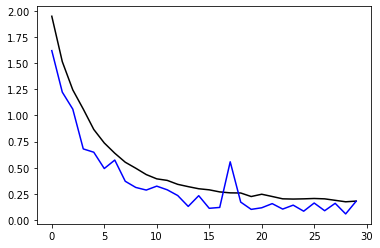

In [9]:
# Visualization of Training and Validation Losses
import matplotlib.pyplot as plt
train_loss = history.history["loss"]
val_loss = history.history["val_loss"]
train_acc = history.history["val_accuracy"]
val_acc = history.history["val_accuracy"]
plt.plot(range(30), train_loss, 'k', range(30), val_loss, 'b')
#plt.plot(range(30), train_acc, range(30), val_acc)

# Testing of Model:

In [12]:
# Import Libraries for Model Testing:
from keras.models import load_model
from keras.preprocessing.image import image_utils
import numpy as np

In [13]:
# Load Model:
model = load_model("vegetable.h5")

In [17]:
# Test Image Path:
testimg_folder_basic = r"C:\Users\ASUS\Documents\python\IBM_Project\Dataset Plant Disease\Veg-dataset\Veg-dataset\test_set"

testimg_folder_sub = "\Tomato___Late_blight"     
testimg = "\\b8b5b34a-6856-4c79-9681-047c1aa47ae0___RS_Late.B 6222.jpg"
testimg_path = testimg_folder_basic + testimg_folder_sub  + testimg

# Categories:
categories =  ['Pepper: Bacterial Leaft Spots', 'Pepper: Healthy',
              'Potato: Early Blight', 'Potato: Healthy', 'Potato: Late Blight',
              'Tomato: Bacterial Spots', 'Tomato: Late Blight', 'Tomato: Leaf Molds', 'Tomato: Septoria Leaf Spot']

In [18]:
# Load Test Image:
test_img = image_utils.load_img(testimg_path ,target_size = (128,128))

# Convert image to array:
test_img = image_utils.img_to_array(test_img)

# Expand Dimention 
test_img = np.expand_dims(test_img, axis = 0)

In [19]:
# Final Prediction:
prediction = model.predict(test_img)

print("")
print("Image category = ", categories[np.argmax(prediction)])

1/1 [==============================] - 0s 17ms/step

Image category =  Tomato: Late Blight
